Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## Importing data

In [1]:
import pandas as pd
data = pd.read_csv("F:/Prodigy internship/Task 2/Data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning

In [4]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
#working on missing vlaues
data['Age'].fillna(data['Age'].median(), inplace = True)
data.dropna(subset=["Embarked"], inplace = True)
data['Cabin'].fillna('Unknown', inplace = True)

In [6]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [7]:
#working on duplicate 
print(data.duplicated().sum())

0


In [8]:
#correcting Data Types
data['Age'] = data['Age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int32  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 86.8+ KB


## Exploratory Data Analysis(EDA)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

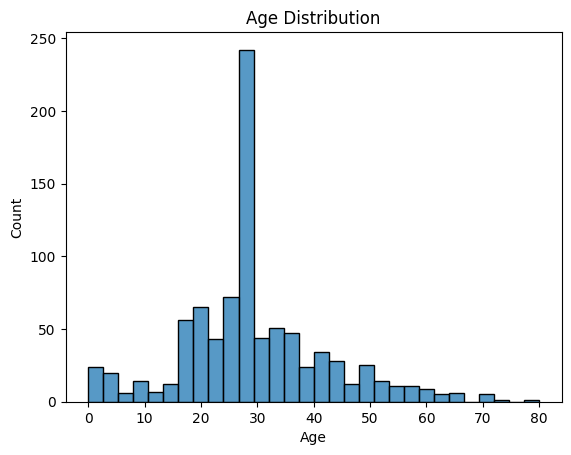

In [10]:
#Age
sns.histplot(data['Age'])
plt.title("Age Distribution")
plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

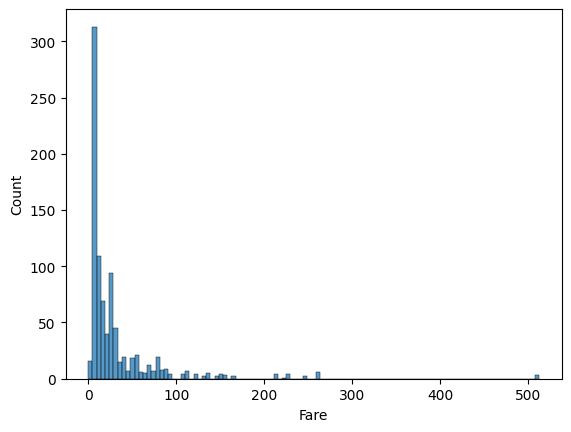

In [11]:
#Fare
sns.histplot(data['Fare'])

<Axes: xlabel='Sex', ylabel='count'>

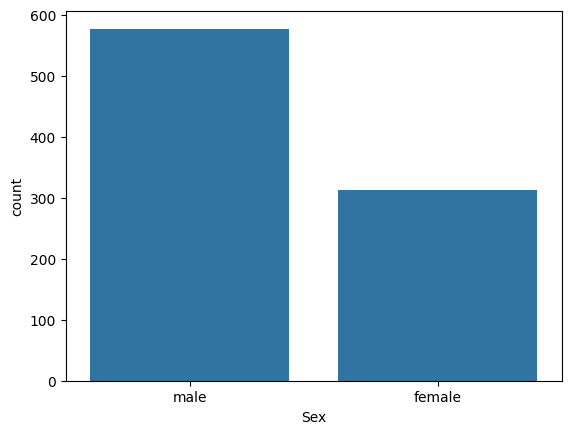

In [12]:
#Sex
sns.countplot(x=data['Sex'])

<Axes: xlabel='Survived', ylabel='Age'>

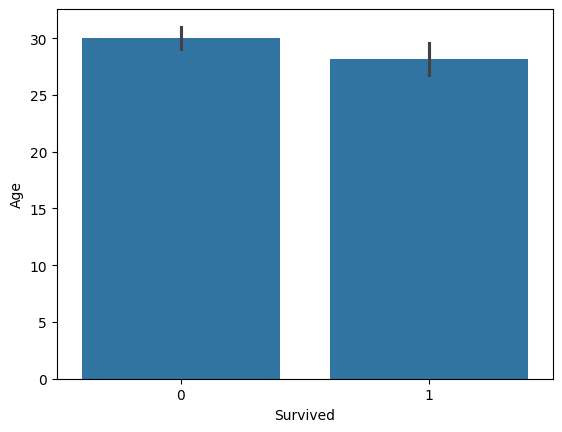

In [13]:
sns.barplot(x='Survived', y='Age', data=data)

<Axes: xlabel='Pclass', ylabel='count'>

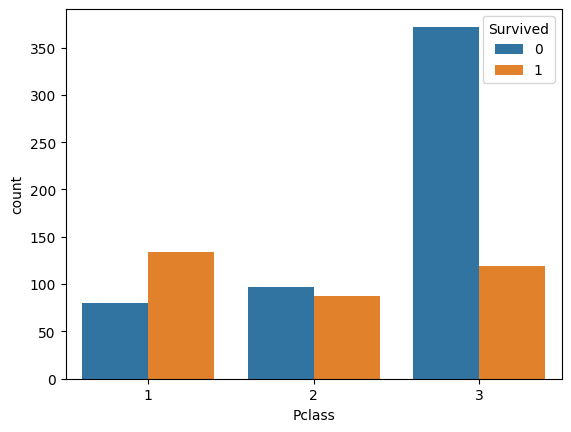

In [17]:
#Survived VS Pclass
sns.countplot(x='Pclass', hue='Survived', data=data)

<Axes: xlabel='Sex', ylabel='count'>

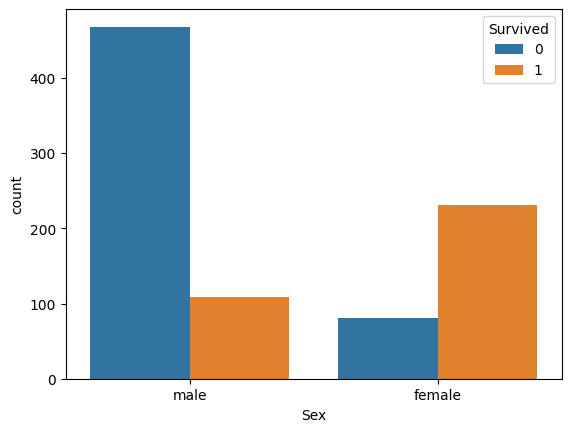

In [18]:
#Survived VS Age
sns.countplot(data=data, x='Sex', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

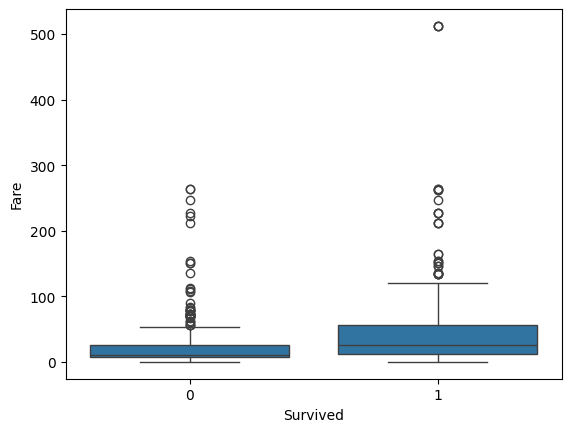

In [25]:
#Fare VS Survived
sns.boxplot(data=data, x='Survived', y='Fare')

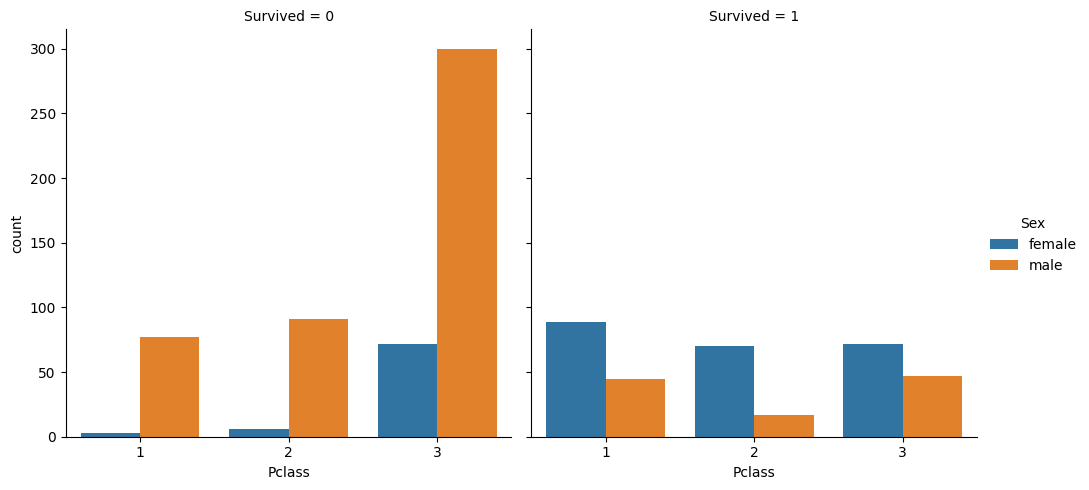

In [28]:
#Pclass VS Sex VS Survived
sns.catplot(data=data, x='Pclass', hue='Sex', col='Survived', kind='count')

<Axes: xlabel='Pclass', ylabel='Age'>

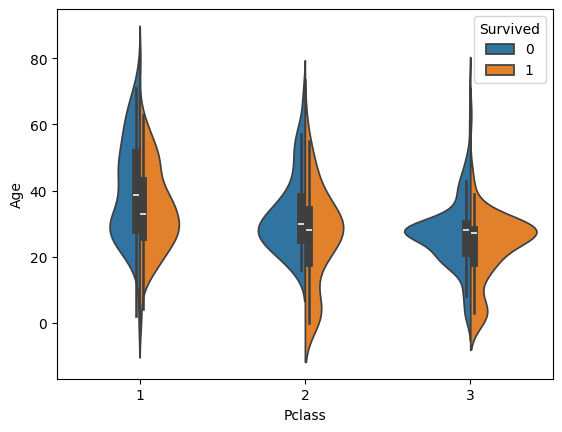

In [29]:
#Age VS Pclass VS Survived
sns.violinplot(data=data, x='Pclass', y='Age', hue='Survived', split=True)

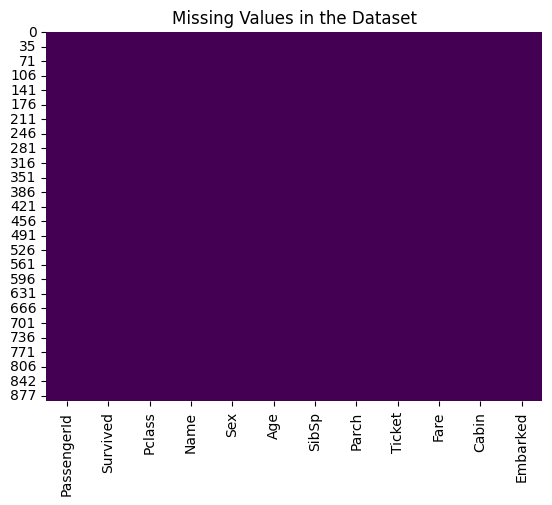

In [32]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

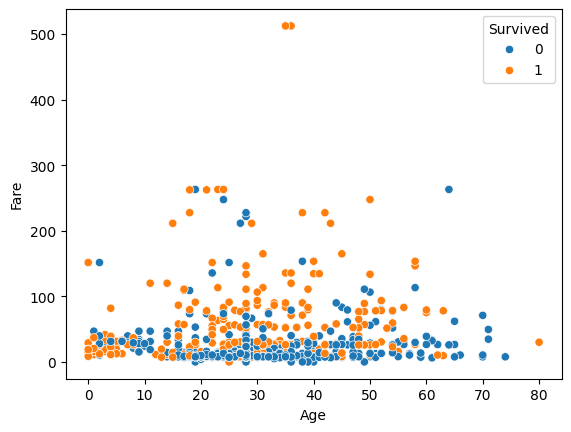

In [15]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)

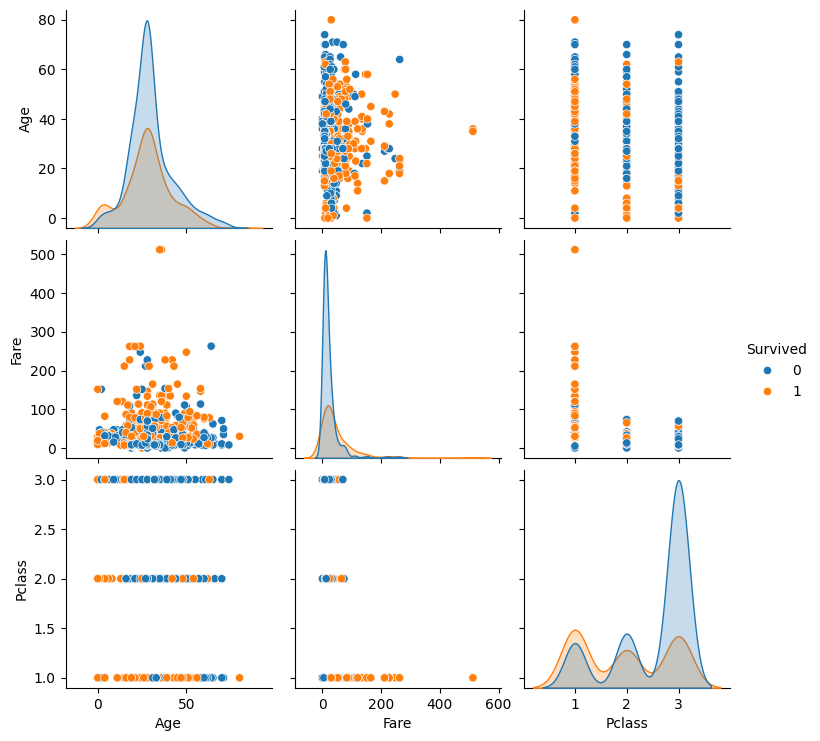

In [16]:
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
